Convert .mat file to HDF5
========

In [2]:
import slab_model
import pylab as plt
import numpy as np
import xarray as xr
from popy import utils,mysignal
from scipy.io import loadmat
import pandas as pd
import pickle

xrod=xr.open_dataset

#########
keys=['UU_mod5', 'UU_modt', 'UU_modx', 'UU_obs', 
      'Uwind_5', 'Uwind_o', 'Uwind_x', 'VV_mod5', 
      'VV_modt', 'VV_modx', 'VV_obs', 'Vwind_5', 'Vwind_o', 
      'Vwind_x']
       
for station in ['PaPa2','KEO2','NTAS2','Stratus2','WHOTS2'][-2:]:
    
    fn='data/from_Hong/%s.mat'%station
    d=loadmat(fn)
    dout={}
    t0=d['readme'][0].split(';')[1].split(':')[0]
    
    tt=pd.date_range(t0,periods=d['UU_obs'].size,freq='1h')
    
    for key in keys:
        dd=d[key][:].flatten()
        print(np.isfinite(dd).sum(),dd.size)
        dout[key]=xr.DataArray(dd,dims=('time'),coords={'time':tt} )
    
    lat=np.float64(d['readme'][0].split('lat=')[1].split(')')[0])
    
    dout=xr.Dataset(dout)
    dout.attrs={'readme':d['readme'],'lat0':lat}

    dout.to_netcdf('data/from_Hong/%s.h5'%station)
    del d

43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
43848 43848
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444
38444 38444


### quick sanity check

In [3]:
dd=xrod('data/from_Hong/Stratus2.h5')
dd

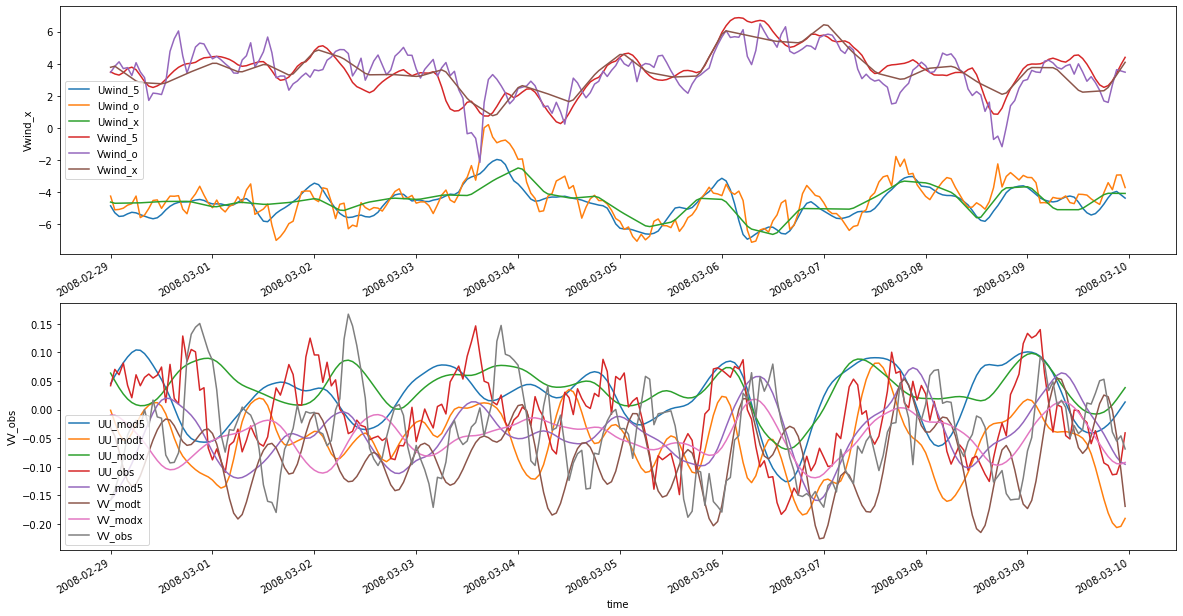

In [13]:
fig,ax=plt.subplots(2,1,figsize=(20,10))
for key in dd.keys():
    if 'wind' in key:
        dd[key].sel(time=slice('2008-02-29 00:00:00', '2008-03-09 23:00:00')).plot(ax=ax[0],label=key)
    else:
        dd[key].sel(time=slice('2008-02-29 00:00:00', '2008-03-09 23:00:00')).plot(ax=ax[1],label=key)
ax[1].legend()
ax[0].legend()